## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [4]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [14]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

model_ckpt = dict()
for b1 in [False,True]:
    for b2 in [False,True]:
        filename = 'save_best_%s;save_weights_%s' %(str(b1),str(b2))
        model_ckpt[filename] = ModelCheckpoint(filepath="./%s.h5" %(filename),monitor="val_loss",
                                               save_best_only=b1,save_weights_only=b2)

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ckpt in model_ckpt.keys():
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,epochs=EPOCHS,batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test),shuffle=True,
              callbacks=[model_ckpt[ckpt]])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    results[ckpt] = {'train-loss': train_loss,
                     'valid-loss': valid_loss,
                     'train-acc': train_acc,
                     'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

Epoch 49/50
49/49 [==============================] - 4s 75ms/step - loss: 0.0195 - accuracy: 0.9985 - val_loss: 3.0965 - val_accuracy: 0.4920
Epoch 50/50
49/49 [==============================] - 4s 75ms/step - loss: 0.0146 - accuracy: 0.9995 - val_loss: 3.1279 - val_accuracy: 0.4941
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None

Epoch 47/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0345 - accuracy: 0.9949 - val_loss: 3.0920 - val_accuracy: 0.4795
Epoch 48/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0334 - accuracy: 0.9941 - val_loss: 3.1351 - val_accuracy: 0.4791
Epoch 49/50
49/49 [==============================] - 4s 76ms/step - loss: 0.0307 - accuracy: 0.9955 - val_loss: 3.2026 - val_accuracy: 0.4921
Epoch 50/50
49/49 [==============================] - 4s 80ms/step - loss: 0.0248 - accuracy: 0.9970 - val_loss: 3.1616 - val_accuracy: 0.4987
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normaliz

Epoch 45/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0542 - accuracy: 0.9884 - val_loss: 3.0944 - val_accuracy: 0.4806
Epoch 46/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0554 - accuracy: 0.9878 - val_loss: 3.0749 - val_accuracy: 0.4815
Epoch 47/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0513 - accuracy: 0.9890 - val_loss: 3.1675 - val_accuracy: 0.4825
Epoch 48/50
49/49 [==============================] - 4s 79ms/step - loss: 0.0455 - accuracy: 0.9906 - val_loss: 3.2278 - val_accuracy: 0.4777
Epoch 49/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0378 - accuracy: 0.9935 - val_loss: 3.1995 - val_accuracy: 0.4836
Epoch 50/50
49/49 [==============================] - 4s 76ms/step - loss: 0.0343 - accuracy: 0.9945 - val_loss: 3.2193 - val_accuracy: 0.4894
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param

Epoch 43/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0682 - accuracy: 0.9842 - val_loss: 2.9966 - val_accuracy: 0.4754
Epoch 44/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0626 - accuracy: 0.9861 - val_loss: 3.3062 - val_accuracy: 0.4740
Epoch 45/50
49/49 [==============================] - 4s 78ms/step - loss: 0.0594 - accuracy: 0.9867 - val_loss: 3.1765 - val_accuracy: 0.4697
Epoch 46/50
49/49 [==============================] - 4s 82ms/step - loss: 0.0529 - accuracy: 0.9887 - val_loss: 3.1801 - val_accuracy: 0.4720
Epoch 47/50
49/49 [==============================] - 4s 83ms/step - loss: 0.0503 - accuracy: 0.9894 - val_loss: 3.1968 - val_accuracy: 0.4790
Epoch 48/50
49/49 [==============================] - 4s 83ms/step - loss: 0.0464 - accuracy: 0.9907 - val_loss: 3.1902 - val_accuracy: 0.4759
Epoch 49/50
49/49 [==============================] - 4s 85ms/step - loss: 0.0414 - accuracy: 0.9921 - val_loss: 3.1045 - val_accuracy: 0.4836
Epoch 

save_best_False;save_weights_False
313/313 [==============================] - 1s 2ms/step - loss: 3.1279 - accuracy: 0.4941
save_best_False;save_weights_True
313/313 [==============================] - 1s 2ms/step - loss: 3.1616 - accuracy: 0.4987
save_best_True;save_weights_False
313/313 [==============================] - 1s 2ms/step - loss: 1.4627 - accuracy: 0.4781
save_best_True;save_weights_True
313/313 [==============================] - 1s 2ms/step - loss: 1.5033 - accuracy: 0.4696


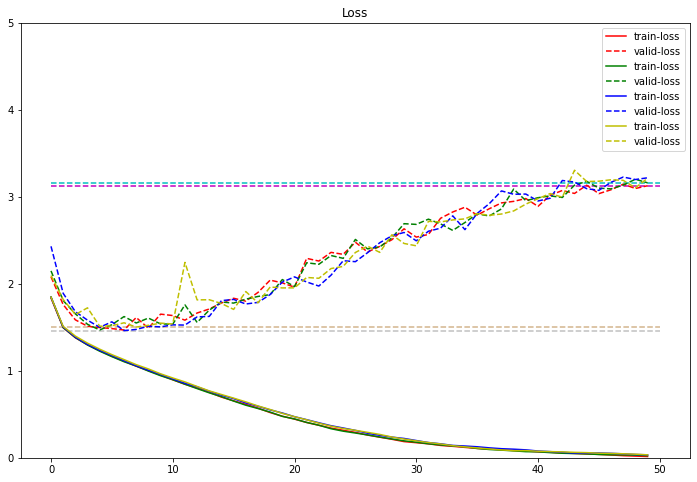

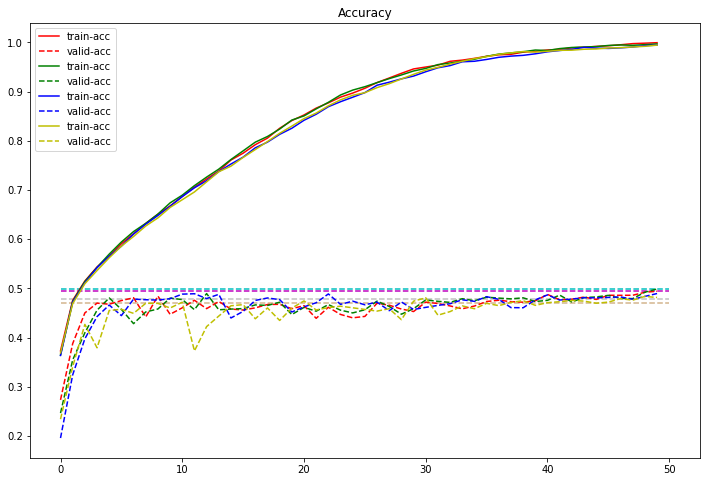

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "c", "silver", "tan", "orange"]

# Load back
for i, m in enumerate(model_ckpt.keys()):
    print(m)
    if 'save_weights_True' in m:
        model.load_weights("./%s.h5" %(m))
    else:
        model = keras.models.load_model("./%s.h5" %(m))
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

    plt.figure(num=1,figsize=(12,8))
    plt.plot(range(len(results[m]['train-loss'])),results[m]['train-loss'], '-', label='train-loss', color=color_bar[i])
    plt.plot(range(len(results[m]['valid-loss'])),results[m]['valid-loss'], '--', label='valid-loss', color=color_bar[i])
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors=color_bar[i+4], linestyles='--')
    plt.title("Loss")
    plt.ylim([0, 5])
    plt.legend()
    #plt.show()

    plt.figure(num=2,figsize=(12,8))
    plt.plot(range(len(results[m]['train-acc'])),results[m]['train-acc'], '-', label='train-acc', color=color_bar[i])
    plt.plot(range(len(results[m]['valid-acc'])),results[m]['valid-acc'], '--', label='valid-acc', color=color_bar[i])
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors=color_bar[i+4], linestyles='--')
    plt.title("Accuracy")
    plt.legend()
plt.show()